In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
# 'unzipped_data/air-quality-across-countries-in-covid19_aestheteaman01/USA.csv'
# 'unzipped_data/covid19-in-usa_sudalairajkumar/us_counties_covid19_daily.csv'
# 'unzipped_data/covid19-in-usa_sudalairajkumar/us_covid19_daily.csv'
# 'unzipped_data/covid19-in-usa_sudalairajkumar/us_states_covid19_daily.csv'

In [3]:
usa_air_q_file = 'unzipped_data/air-quality-across-countries-in-covid19_aestheteaman01/USA.csv'
df_aq_us = pd.read_csv(usa_air_q_file,
                       parse_dates=['Date'],
                       dayfirst=True,
                       index_col='Date')
df_aq_us.info()

FileNotFoundError: [Errno 2] No such file or directory: 'unzipped_data/air-quality-across-countries-in-covid19_aestheteaman01/USA.csv'

In [ ]:
df_aq_us.sort_index()

In [ ]:
df_la = df_aq_us[df_aq_us['City']=='Los Angeles'].sort_index().drop(['Country','City'], axis=1)
df_la

In [ ]:
df_la['Specie'].value_counts()

In [ ]:
df_la.pivot_table(columns=['Specie'])

In [ ]:
df_ct = pd.read_csv('unzipped_data/covid19-in-usa_sudalairajkumar/us_counties_covid19_daily.csv',
                    parse_dates=True,
                    index_col='date')
df_ct

In [ ]:
df_ct[(df_ct['state']=='California') & (df_ct['county']=='Los Angeles')].sort_index()

In [4]:
df_la.columns

NameError: name 'df_la' is not defined

In [5]:
df_la.drop('variance', axis=1).reset_index().groupby(['Date','Specie']).median().plot()

NameError: name 'df_la' is not defined

In [6]:
df_la.groupby(['Specie']).median().drop(['variance','count'], axis=1)

NameError: name 'df_la' is not defined

In [7]:
df_la.to_period('D').drop(['variance','count','min','max'], axis=1)

NameError: name 'df_la' is not defined

In [8]:
df_la[df_la['Specie']=='pm25'].to_period('D').drop(['variance','count','min','max'], axis=1)

NameError: name 'df_la' is not defined

In [9]:
df_la[df_la['Specie']=='pm25'].to_period('D').drop(['variance','count','min','max'], axis=1).plot()

NameError: name 'df_la' is not defined

In [10]:
df_la.drop(['variance','count','min','max'], axis=1)

NameError: name 'df_la' is not defined

In [11]:
df_la.drop(['variance','count','min','max'], axis=1).pivot(columns='Specie')

NameError: name 'df_la' is not defined

In [12]:
df_la.drop(['variance','count','min','max'], axis=1).to_period('D').pivot(columns='Specie').plot()

NameError: name 'df_la' is not defined

In [13]:
pv_df_la = df_la.drop(['variance','count','min','max'], axis=1).pivot(columns='Specie')
pv_df_la

NameError: name 'df_la' is not defined

In [14]:
pv_df_la.describe()

NameError: name 'pv_df_la' is not defined

In [15]:
pv_df_la.columns

NameError: name 'pv_df_la' is not defined

In [16]:
pv_df_la.columns.droplevel()

NameError: name 'pv_df_la' is not defined

In [17]:
pv_df_la.columns = pv_df_la.columns.droplevel()
pv_df_la

NameError: name 'pv_df_la' is not defined

In [18]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1).to_period('D').plot()

NameError: name 'pv_df_la' is not defined

In [19]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1) \
        .rolling(window=7, center=False) \
        .mean() \
        .to_period('D') \
        .plot()

NameError: name 'pv_df_la' is not defined

<AxesSubplot:xlabel='Date'>

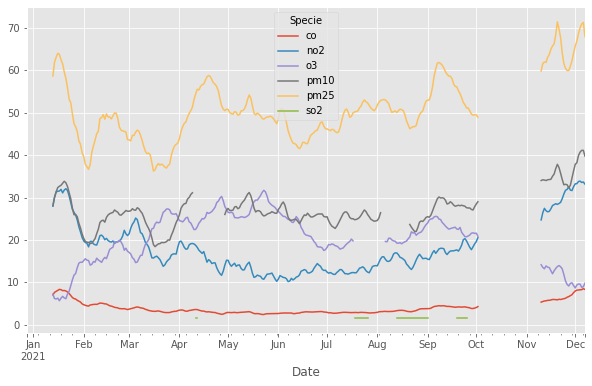

In [26]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1) \
        .rolling(window=17, center=False) \
        .mean() \
        .to_period('D') \
        .plot()

<AxesSubplot:xlabel='Date'>

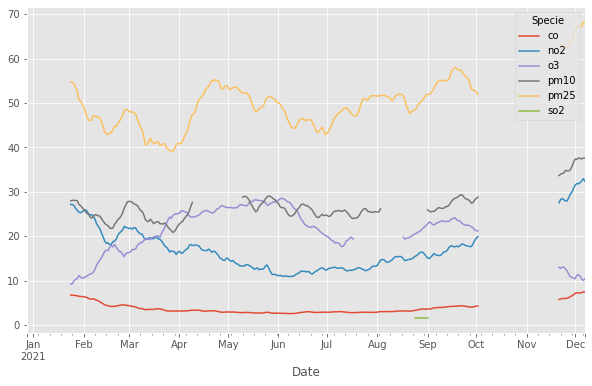

In [27]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1) \
        .rolling(window=28, center=False) \
        .mean() \
        .to_period('D') \
        .plot()

In [28]:
# Dataset:
# "COVID-19 Reported Patient Impact and Hospital Capacity by Facility"
# <https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/uqq2-txqb>
cov_dataset_name = 'COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_--_RAW.csv'

In [29]:
raw_cov_df = pd.read_csv(cov_dataset_name,
                         parse_dates=True,
                         na_values=-999999,
                         index_col='collection_week')
raw_cov_df.index

DatetimeIndex(['2022-01-28', '2022-01-28', '2022-01-28', '2022-01-28',
               '2022-01-28', '2022-01-28', '2022-01-28', '2022-01-28',
               '2022-01-28', '2022-01-28',
               ...
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31'],
              dtype='datetime64[ns]', name='collection_week', length=394846, freq=None)

In [30]:
raw_cov_df = raw_cov_df.sort_index()

In [31]:
raw_cov_df.columns

Index(['hospital_pk', 'state', 'ccn', 'hospital_name', 'address', 'city',
       'zip', 'hospital_subtype', 'fips_code', 'is_metro_micro',
       ...
       'previous_day_admission_adult_covid_confirmed_7_day_coverage',
       'previous_day_admission_pediatric_covid_confirmed_7_day_coverage',
       'previous_day_admission_adult_covid_suspected_7_day_coverage',
       'previous_day_admission_pediatric_covid_suspected_7_day_coverage',
       'previous_week_personnel_covid_vaccinated_doses_administered_7_day',
       'total_personnel_covid_vaccinated_doses_none_7_day',
       'total_personnel_covid_vaccinated_doses_one_7_day',
       'total_personnel_covid_vaccinated_doses_all_7_day',
       'previous_week_patients_covid_vaccinated_doses_one_7_day',
       'previous_week_patients_covid_vaccinated_doses_all_7_day'],
      dtype='object', length=107)

In [32]:
ED_cols = raw_cov_df.columns[raw_cov_df.columns.str.contains('ED')]
ED_cols

Index(['previous_day_covid_ED_visits_7_day_sum', 'previous_day_total_ED_visits_7_day_sum'], dtype='object')

In [33]:
raw_cov_df[ED_cols]

,previous_day_covid_ED_visits_7_day_sum,previous_day_total_ED_visits_7_day_sum
collection_week,,
2020-07-31,159.0,249.0
2020-07-31,0.0,12.0
2020-07-31,0.0,6.0
2020-07-31,6.0,157.0
2020-07-31,0.0,6.0
...,...,...
2022-01-28,0.0,0.0
2022-01-28,104.0,982.0
2022-01-28,159.0,1403.0


<AxesSubplot:xlabel='collection_week'>

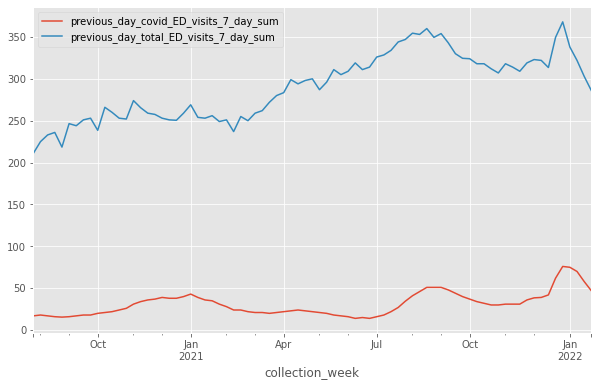

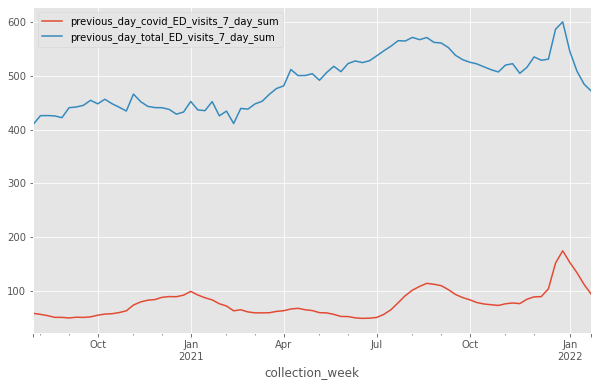

In [34]:
raw_cov_df[ED_cols].groupby(['collection_week']).median().plot()
raw_cov_df[ED_cols].groupby(['collection_week']).mean().plot()

In [35]:
df_temp_test_aq_la = pv_df_la.drop(['dew',
                                    'humidity',
                                    'pressure',
                                    'wind-gust',
                                    'wind-speed',
                                    'temperature'],axis=1)
df_cov_aq_la = raw_cov_df[ED_cols].groupby(['collection_week']).median()
df_cov_aq_la[df_temp_test_aq_la.columns] = df_temp_test_aq_la
df_cov_aq_la

,previous_day_covid_ED_visits_7_day_sum,previous_day_total_ED_visits_7_day_sum,co,no2,o3,pm10,pm25,so2
collection_week,,,,,,,,
2020-07-31,17.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-07,18.0,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-14,17.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-21,16.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-28,15.5,218.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-31,76.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,75.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-14,70.0,322.0,NaN,NaN,NaN,NaN,NaN,NaN


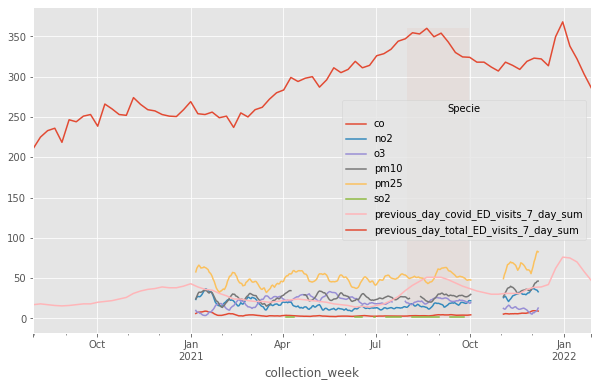

In [44]:
fig,ax = plt.subplots()
df_temp_test_aq_la = pv_df_la.drop(['dew',
                                    'humidity',
                                    'pressure',
                                    'wind-gust',
                                    'wind-speed',
                                    'temperature'],axis=1)
df_temp_test_aq_la.rolling(window=10).mean().to_period('D').plot(ax=ax)
raw_cov_df[ED_cols].groupby(['collection_week']).median().to_period('D').plot(ax=ax)
plt.fill_between(pd.date_range('2021-8','2021-10')[0:-1],360,alpha=0.05)